<a href="https://colab.research.google.com/github/hemant5668/kaggle-titanic/blob/master/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
#import data 
train_data=pd.read_csv('/content/train.csv')
test_data=pd.read_csv('/content/test.csv')

In [0]:
train_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [0]:
train_data.shape

(891, 12)

In [0]:
import seaborn as sns


In [0]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

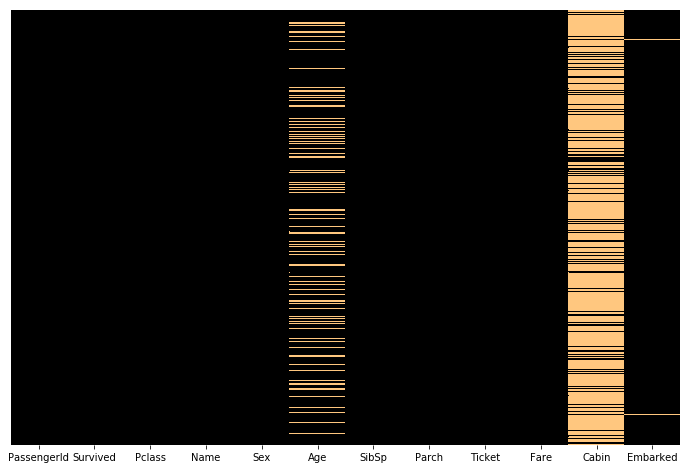

In [0]:
plt.figure(figsize=(12,8))
sns.heatmap(train_data.isnull(),cbar=False,yticklabels=False,cmap='copper')

In [0]:
train_data.drop(['Name','PassengerId','Ticket','Cabin'],axis=1,inplace=True)
train_data['Age']=train_data['Age'].fillna(train_data['Age'].mean())

train_data['Embarked']=train_data['Embarked'].fillna(train_data['Embarked'].mode()[0])

In [0]:
print(train_data.head())
print('//n')
train_data.isnull().sum()

   Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0         0       3    male  22.0      1      0   7.2500        S
1         1       1  female  38.0      1      0  71.2833        C
2         1       3  female  26.0      0      0   7.9250        S
3         1       1  female  35.0      1      0  53.1000        S
4         0       3    male  35.0      0      0   8.0500        S
//n


Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [0]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
train_data['Sex']=le.fit_transform(train_data['Sex'])


In [0]:
train_data['Embarked']=le.fit_transform(train_data['Embarked'])

In [0]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [0]:
clean_train=train_data.copy()

In [0]:
train_data.shape

(891, 8)

In [0]:
test_data.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [0]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [0]:
test_data.shape

(418, 11)

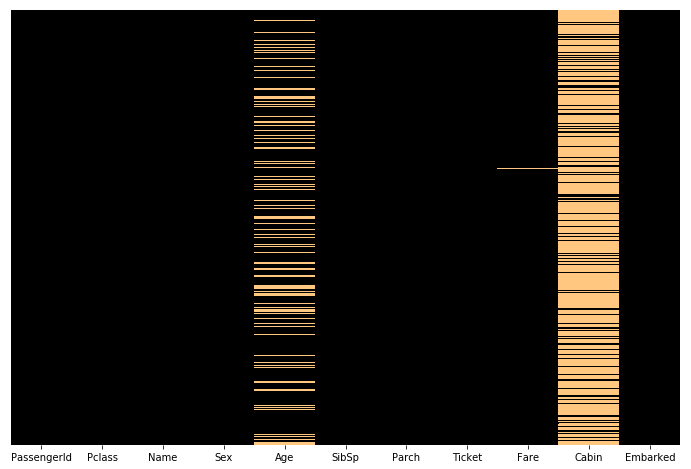

In [0]:
plt.figure(figsize=(12,8))
sns.heatmap(test_data.isnull(),cbar=False,yticklabels=False,cmap='copper')

In [0]:
test_data.drop(['Name','PassengerId','Ticket','Cabin'],axis=1,inplace=True)
test_data['Age']=test_data['Age'].fillna(test_data['Age'].mean())
test_data['Fare']=test_data['Fare'].fillna(test_data['Fare'].mean())

In [0]:
test_data.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [0]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
test_data['Sex']=le.fit_transform(test_data['Sex'])


In [0]:
test_data['Embarked']=le.fit_transform(test_data['Embarked'])

In [0]:
test_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,1
1,3,0,47.0,1,0,7.0000,2
2,2,1,62.0,0,0,9.6875,1
3,3,1,27.0,0,0,8.6625,2
4,3,0,22.0,1,1,12.2875,2


In [0]:
test_data.shape

(418, 7)

In [0]:
x_train=train_data.drop(['Survived'],axis=1)

In [0]:
y_train=train_data['Survived']

In [0]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=100)

In [0]:
rfc.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
pred=rfc.predict(test_data)

In [0]:
acc_decision_tree = round(rfc.score(x_train, y_train) * 100, 4)

In [0]:
acc_decision_tree

98.2043

In [0]:
pred.shape

(418,)

In [0]:
sample=pd.read_csv('/content/gender_submission.csv')

In [0]:
sample.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [0]:
sub=pd.DataFrame(pred)

In [0]:
sub.columns=['Survived']

In [0]:
sample.drop(['Survived'],axis=1,inplace=True)

In [0]:
sample.size

418

In [0]:
res=pd.concat([sample,sub],axis=1)

In [0]:
res.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,1


In [0]:
res.to_csv('titanic',index=False)

In [0]:
#using xgboost


In [0]:
from xgboost import XGBClassifier
model=XGBClassifier()
model.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
pred1=model.predict(test_data)

In [0]:
pred1

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [0]:
pred1.shape

(418,)

In [0]:
acc_xgb = round(model.score(x_train, y_train) * 100, 4)

In [0]:
acc_xgb

87.2054

In [0]:
#output of xgb
sample=pd.read_csv('/content/gender_submission.csv')
sub1=pd.DataFrame(pred1)
sub1.columns=['Survived']
sample.drop(['Survived'],axis=1,inplace=True)
res1=pd.concat([sample,sub1],axis=1)

In [0]:
res1.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [0]:
res1.to_csv('titanic_xgb',index=False)

In [0]:
#using ANN

In [0]:
import keras

In [0]:
from keras.models import Sequential
from keras.layers import Dense

In [0]:
ann_model=Sequential()

In [0]:
ann_model.add(Dense(25,kernel_initializer='uniform',activation='sigmoid',input_dim=7))

In [0]:
ann_model.add(Dense(10,kernel_initializer='uniform',activation='sigmoid'))

In [0]:
ann_model.add(Dense(25,kernel_initializer='uniform',activation='sigmoid'))

In [0]:
#output
ann_model.add(Dense(1,activation='sigmoid',kernel_initializer='uniform'))

In [0]:
#compile
ann_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [0]:
ann_model.fit(x_train,y_train,batch_size=10,epochs=100)

Epoch 1/100
891/891 [==============================] - 1s 949us/step - loss: 0.6744 - acc: 0.6027
Epoch 2/100
891/891 [==============================] - 0s 149us/step - loss: 0.6673 - acc: 0.6162
Epoch 3/100
891/891 [==============================] - 0s 142us/step - loss: 0.6663 - acc: 0.6162
Epoch 4/100
891/891 [==============================] - 0s 152us/step - loss: 0.6670 - acc: 0.6162
Epoch 5/100
891/891 [==============================] - 0s 148us/step - loss: 0.6661 - acc: 0.6162
Epoch 6/100
891/891 [==============================] - 0s 146us/step - loss: 0.6673 - acc: 0.6162
Epoch 7/100
891/891 [==============================] - 0s 141us/step - loss: 0.6656 - acc: 0.6162
Epoch 8/100
891/891 [==============================] - 0s 150us/step - loss: 0.6653 - acc: 0.6162
Epoch 9/100
891/891 [==============================] - 0s 144us/step - loss: 0.6656 - acc: 0.6162
Epoch 10/100
891/891 [==============================] - 0s 142us/step - loss: 0.6647 - acc: 0.6162
Epoch 11/100
891/89

In [0]:
pred5=ann_model.predict(test_data)

In [0]:
pred5

array([[0.08788317],
       [0.11973006],
       [0.08278725],
       [0.08496496],
       [0.19758564],
       [0.08794239],
       [0.48434308],
       [0.11168739],
       [0.6861011 ],
       [0.08557537],
       [0.08404675],
       [0.16522285],
       [0.93520665],
       [0.08885103],
       [0.93342006],
       [0.88833725],
       [0.11370069],
       [0.10552633],
       [0.14809436],
       [0.21663928],
       [0.13504216],
       [0.31902754],
       [0.9346596 ],
       [0.3095075 ],
       [0.89607286],
       [0.08198798],
       [0.93272483],
       [0.10441592],
       [0.21540159],
       [0.09660879],
       [0.10296667],
       [0.09361094],
       [0.29253548],
       [0.31927055],
       [0.25875145],
       [0.10752416],
       [0.26617002],
       [0.32998788],
       [0.08587778],
       [0.17083356],
       [0.09500033],
       [0.2558558 ],
       [0.08279851],
       [0.84504116],
       [0.9324724 ],
       [0.08480832],
       [0.19760919],
       [0.088

In [0]:
rounded5 = [int(np.round(x)) for x in pred5]

In [0]:
pr=pd.DataFrame(rounded5)

In [0]:
pr.tail(10)

,0
408,0
409,1
410,0
411,1
412,0
413,0
414,1
415,0
416,0
417,0


In [0]:
#output of xgb
sample=pd.read_csv('/content/gender_submission.csv')

pr.columns=['Survived']
sample.drop(['Survived'],axis=1,inplace=True)
res5=pd.concat([sample,pr],axis=1)

In [0]:
res5.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [0]:
res2.to_csv('titanic_ann5',index=False)